# 02 — Model Training

## 1. Overview

This notebook brings together the full modeling workflow: training baseline models, tuning their hyperparameters, and selecting the final model for interpretation and reporting. After completing the data cleaning (Notebook 00) and exploratory data analysis (Notebook 01), we now have a clear understanding of the dataset’s structure and the key variables that influence the target. The next step is to translate these insights into predictive performance.

In this notebook, we will:

* Prepare the cleaned dataset for modeling (feature selection, encoding, scaling)

* Train baseline models to establish reference performance

* Perform hyperparameter tuning using systematic search strategies

* Compare tuned models to identify the best-performing approach

* Train the final model using the optimal hyperparameters

* Evaluate the final model on unseen data

* Analyze feature importance and interpretability where relevant

By combining model training, tuning, and final selection into a single workflow, this notebook provides a complete and transparent modeling pipeline. The final output of this notebook will be the fully trained model that will be used for interpretation, reporting, and any downstream analysis.

In [4]:
import sys
import os

# Determine the project root (one level above the notebook directory)
project_root = os.path.abspath("..")

# Add project root to Python path so modules in /src can be imported
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

# Build data directory path
data_dir = os.path.join(project_root, "data")
print("Data directory:", data_dir)


Project root added: C:\Users\shari\OneDrive\MSc Data Science and Society\Thesis_DSS_2026
Data directory: C:\Users\shari\OneDrive\MSc Data Science and Society\Thesis_DSS_2026\data


## 2. Imports

In [6]:
import numpy as np 
import pandas as pd


from src.modeling import (
    evaluate_model,
    run_all_models_for_regime,
    run_median_baseline,
    run_ridge,
    run_rf,
    run_xgb,
    run_all_models_for_regime
)

from src.model_comparison import (
    build_cross_model_comparison,
    compare_models,
    run_pairwise_tests
)
# Config
from src.config import GLOBAL_CONFIG

# EDA
from src.eda import (
    inspect_regime,
    run_full_eda,
    list_sorted_correlations,
    target_summary
)

# Metrics
from src.metrics import (
    rmse,
    mae,
    r2,
    error_analysis,
    bootstrap_rmse_ci
)

# feature filtering 
from src.feature_filtering import (
    drop_high_missing_cols, 
    drop_constant_and_near_constant_cols,
    drop_multicollinear_cols
)

# Feature engineering
from src.data_preparation import (
    prepare_data,
    build_preprocessor
)

# feature importances 
from src.feature_importance import (
    get_feature_names,
    ridge_coefficients,
    rf_gini_importance,
    xgb_importance
)

# Transformations
from src.transforms import (
    detect_col_types,
    inverse_target_corrected, 
    LogTransformer, 
    inverse_target,
    transform_target
)

from src.feature_engineering import build_preprocessor
# Plotting
from src.plotting import (
    plot_error_distribution,
    plot_per_fold_rmse,
    plot_predicted_vs_actual
)


## 3. Load datasets

In [8]:
# Load datasets
df_clean = pd.read_parquet(os.path.join(data_dir, "clean", "df_clean.parquet"))

df_regime_a = pd.read_parquet(os.path.join(data_dir, "regimes", "regime_a.parquet"))
df_regime_b = pd.read_parquet(os.path.join(data_dir, "regimes", "regime_b.parquet"))
df_regime_c = pd.read_parquet(os.path.join(data_dir, "regimes", "regime_c.parquet"))



## 4. Model Training, Hyperparameter Tuning, Model Evauation


RUNNING FULL EXPERIMENT – Regime A
Dropped (high missing): ['006', '009', '031', '033', '036', '038', '039', '040', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '055', '056', '057', '059', '060', '061', '062', '063', '064', '066', '067', '068', '069', '070', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '083', '084', '086', '087', '103', '104', '105', '106', '107', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '119', '120', '124', '125', '128', '129', '130', '131', '133', '135', '137', '138', '139', '144', '308', '309', '310', '311', '312', '314', '315', '316', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '

C:\Users\shari\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=8. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Dropped (high missing): ['006', '009', '031', '033', '036', '038', '039', '040', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '055', '056', '057', '059', '060', '061', '062', '063', '064', '066', '067', '068', '069', '070', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '083', '084', '086', '087', '103', '104', '105', '106', '107', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '119', '120', '124', '125', '128', '129', '130', '131', '133', '135', '137', '138', '139', '144', '308', '309', '310', '311', '312', '314', '315', '316', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '3

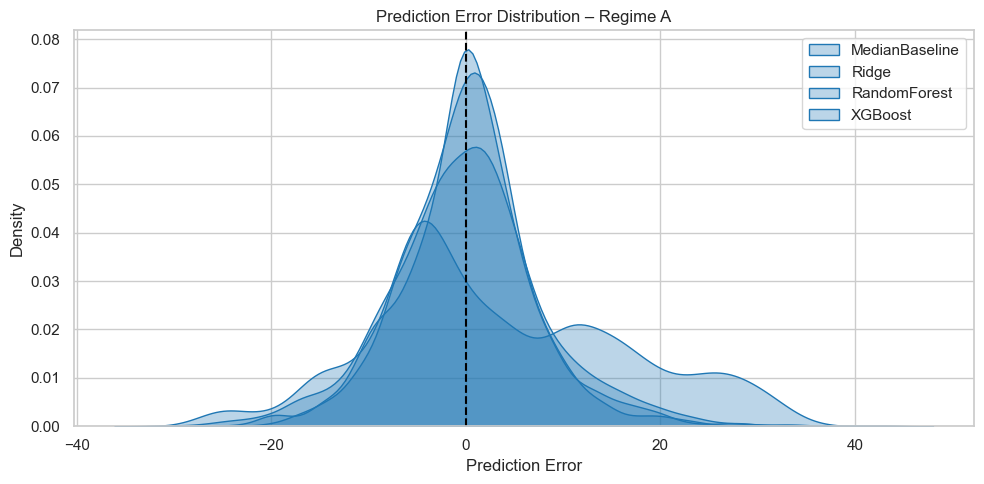

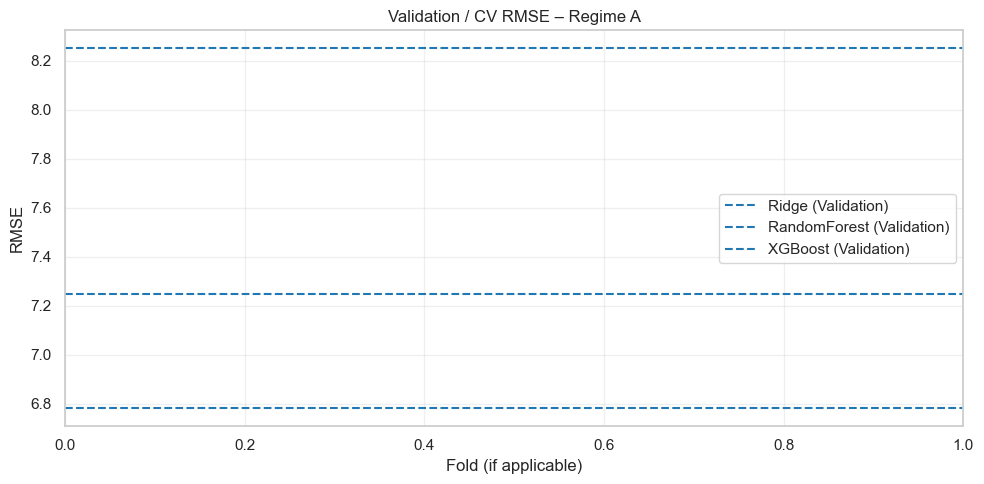

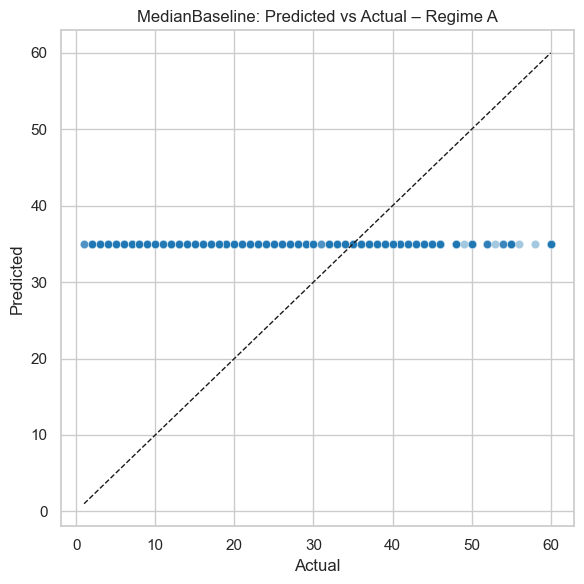

Saved plot to: figures\Regime_A_MedianBaseline_pred_vs_actual.png


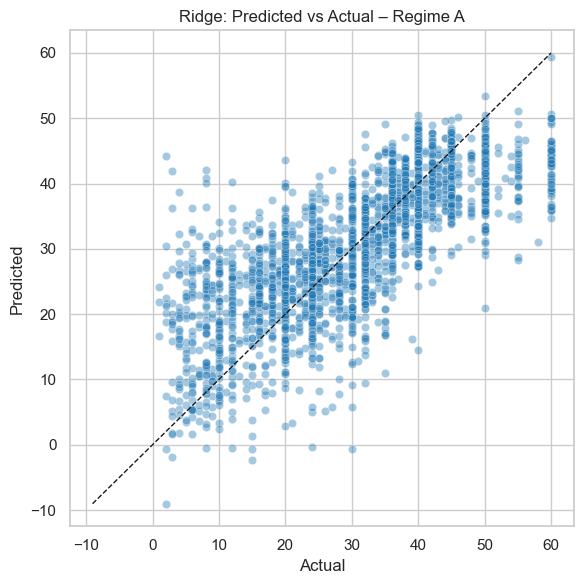

Saved plot to: figures\Regime_A_Ridge_pred_vs_actual.png


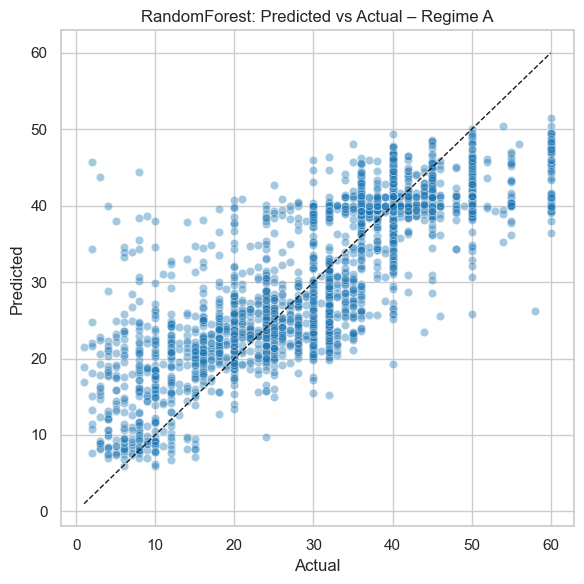

Saved plot to: figures\Regime_A_RandomForest_pred_vs_actual.png


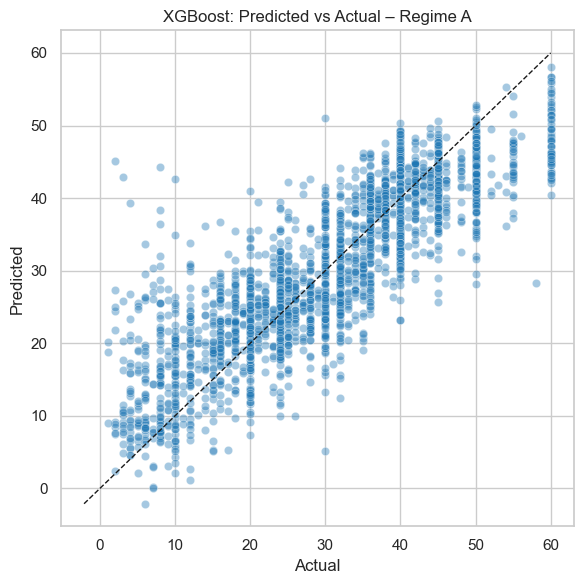

Saved plot to: figures\Regime_A_XGBoost_pred_vs_actual.png

RUNNING FULL EXPERIMENT – Regime B
Dropped (high missing): ['006', '009', '031', '033', '036', '038', '039', '040', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '055', '056', '057', '059', '060', '061', '062', '063', '064', '066', '067', '068', '069', '070', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '083', '084', '086', '087', '103', '104', '105', '106', '107', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '119', '120', '124', '125', '128', '129', '130', '131', '133', '135', '508', '137', '138', '139', '144', '308', '309', '310', '311', '312', '313', '314', '315', '316', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357'

C:\Users\shari\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=8. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Dropped (high missing): ['006', '009', '031', '033', '036', '038', '039', '040', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '055', '056', '057', '059', '060', '061', '062', '063', '064', '066', '067', '068', '069', '070', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '083', '084', '086', '087', '103', '104', '105', '106', '107', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '119', '120', '124', '125', '128', '129', '130', '131', '133', '135', '508', '137', '138', '139', '144', '308', '309', '310', '311', '312', '313', '314', '315', '316', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '3

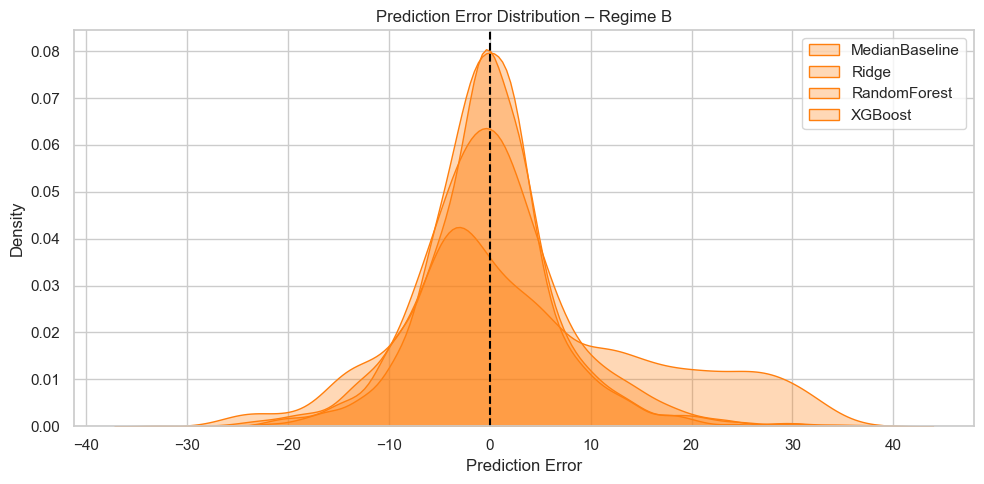

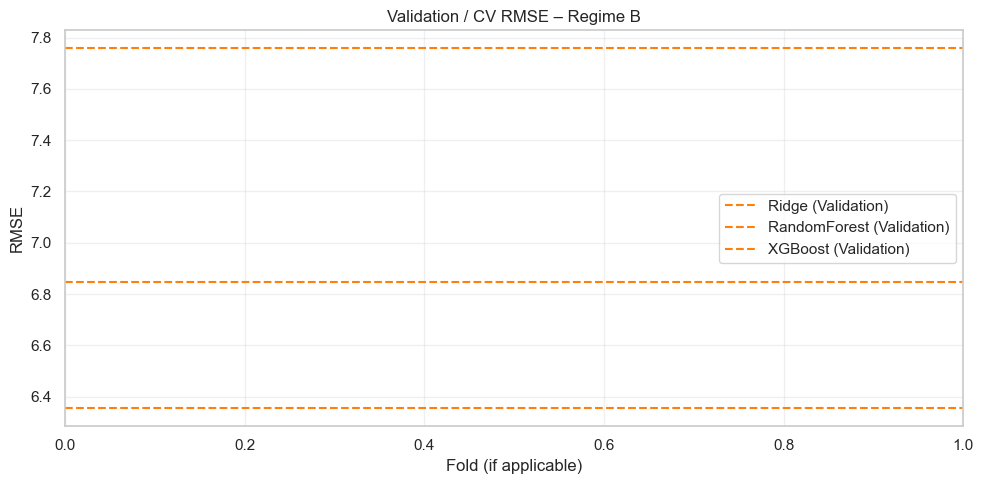

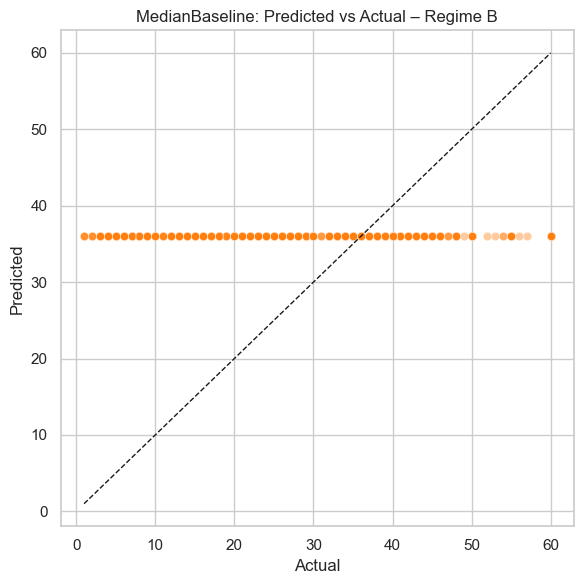

Saved plot to: figures\Regime_B_MedianBaseline_pred_vs_actual.png


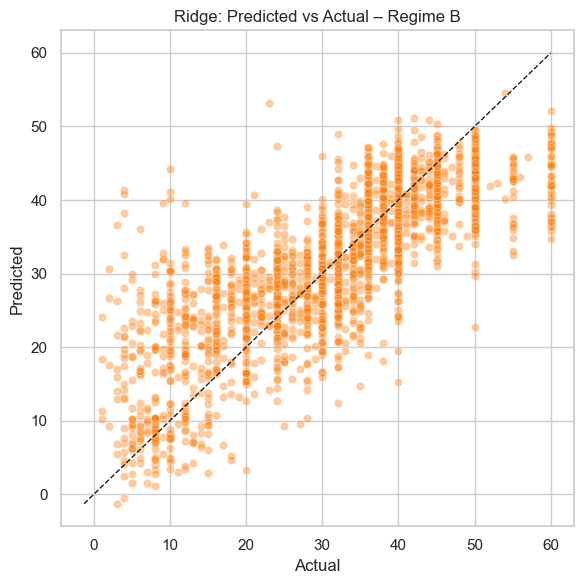

Saved plot to: figures\Regime_B_Ridge_pred_vs_actual.png


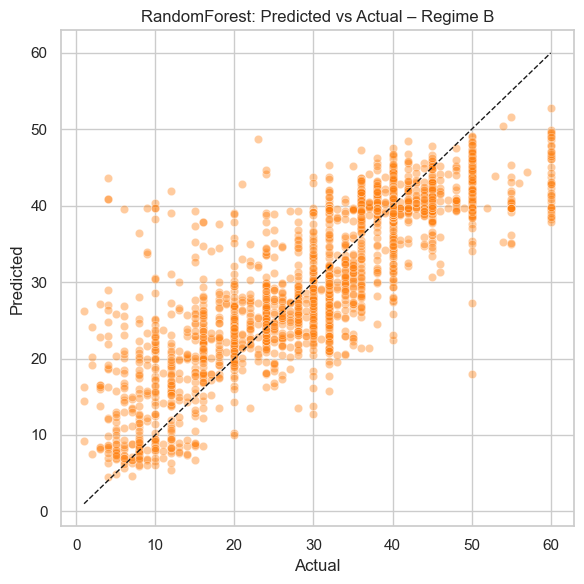

Saved plot to: figures\Regime_B_RandomForest_pred_vs_actual.png


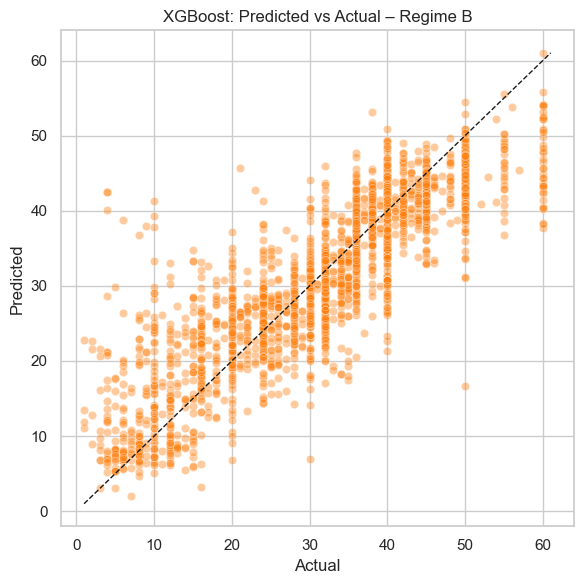

Saved plot to: figures\Regime_B_XGBoost_pred_vs_actual.png

RUNNING FULL EXPERIMENT – Regime C
Dropped (high missing): ['004', '006', '009', '028', '030', '031', '032', '033', '034', '036', '038', '039', '040', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '055', '056', '057', '059', '060', '061', '062', '063', '064', '066', '067', '068', '069', '070', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '083', '084', '086', '087', '103', '104', '105', '106', '107', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '119', '120', '124', '125', '128', '129', '130', '131', '132', '133', '135', '508', '137', '138', '139', '144', '310', '311', '312', '314', '315', '316', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354'

C:\Users\shari\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=8. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Dropped (high missing): ['004', '006', '009', '028', '030', '031', '032', '033', '034', '036', '038', '039', '040', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '055', '056', '057', '059', '060', '061', '062', '063', '064', '066', '067', '068', '069', '070', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '083', '084', '086', '087', '103', '104', '105', '106', '107', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '119', '120', '124', '125', '128', '129', '130', '131', '132', '133', '135', '508', '137', '138', '139', '144', '310', '311', '312', '314', '315', '316', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '3

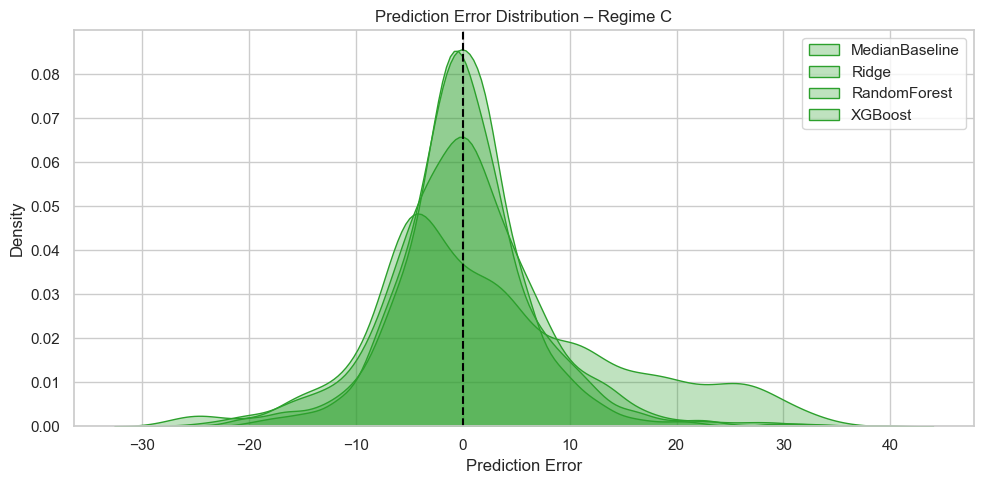

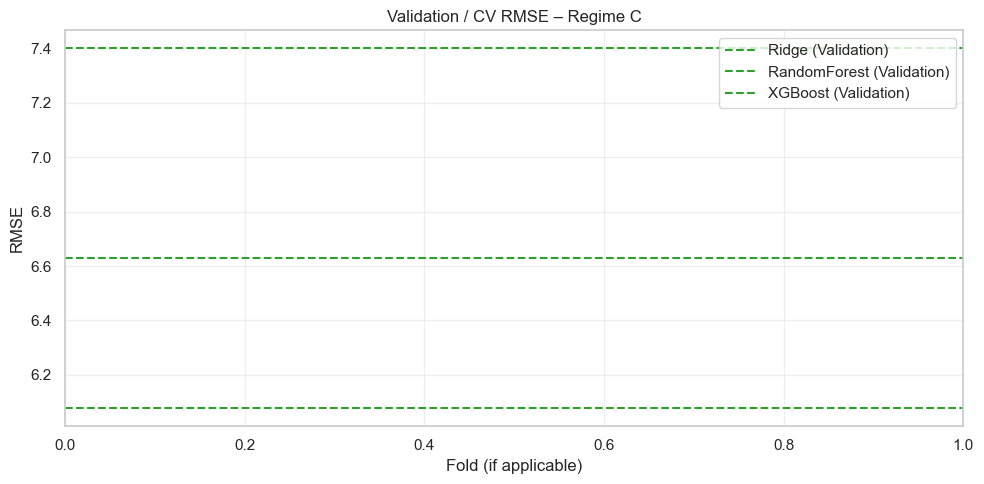

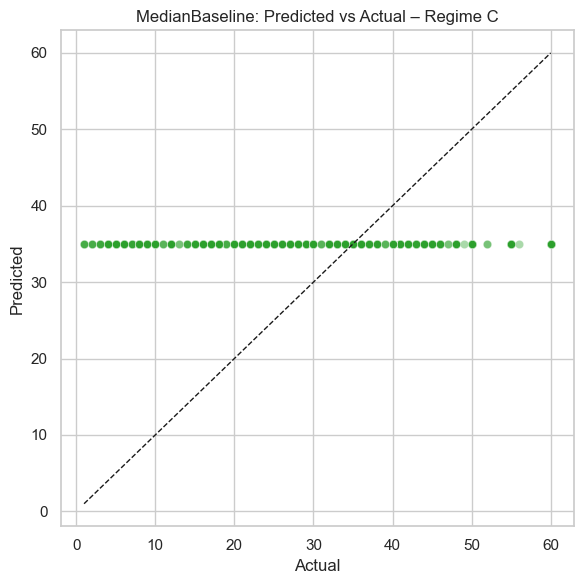

Saved plot to: figures\Regime_C_MedianBaseline_pred_vs_actual.png


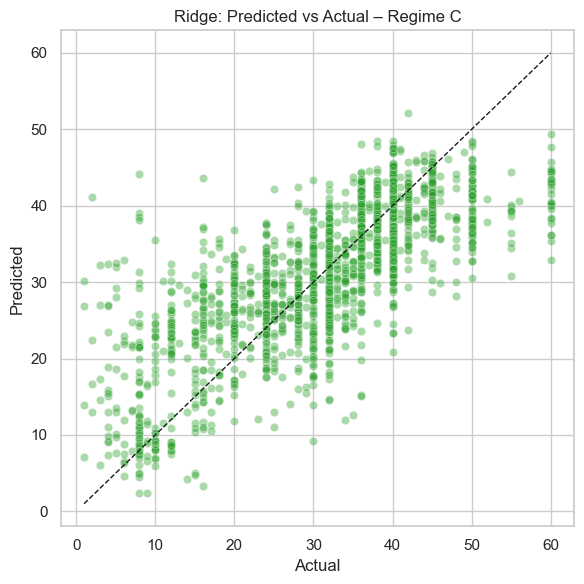

Saved plot to: figures\Regime_C_Ridge_pred_vs_actual.png


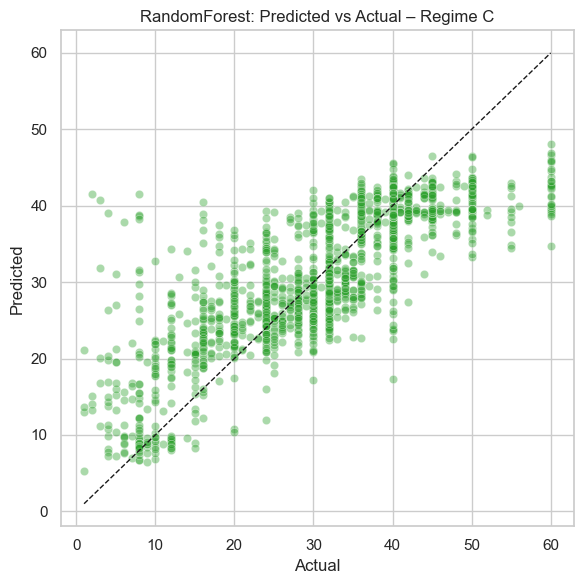

Saved plot to: figures\Regime_C_RandomForest_pred_vs_actual.png


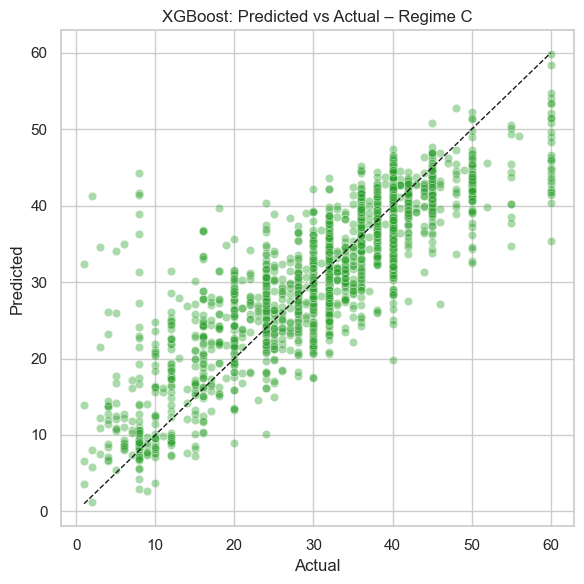

Saved plot to: figures\Regime_C_XGBoost_pred_vs_actual.png


In [10]:

ALL_RESULTS = {}

# Dictionary of regime names and their corresponding datasets
regimes = {
    "Regime A": df_regime_a,
    "Regime B": df_regime_b,
    "Regime C": df_regime_c
}

# Execute full modeling workflow for each regime
for regime_name, df_regime in regimes.items():
    ALL_RESULTS[regime_name] = run_all_models_for_regime(
        regime_name=regime_name,
        df=df_regime,
        config=GLOBAL_CONFIG
    )

## 3. Best Hyperparamets 

In [12]:
# Dispaly best parameters for each model in each regime

for regime_name, regime_data in ALL_RESULTS.items():
    print(f"\n===== {regime_name} – Best Hyperparameters =====")
    for model_name, model_res in regime_data["results"].items():
        print(f"{model_name}: {model_res['best_params_overall']}")


===== Regime A – Best Hyperparameters =====
MedianBaseline: None
Ridge: {'model__alpha': 10}
RandomForest: {'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 14}
XGBoost: {'model__subsample': 0.8, 'model__reg_lambda': 0.05, 'model__reg_alpha': 0.1, 'model__min_child_weight': 5, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__gamma': 0.01, 'model__colsample_bytree': 0.8}

===== Regime B – Best Hyperparameters =====
MedianBaseline: None
Ridge: {'model__alpha': 10}
RandomForest: {'model__n_estimators': 500, 'model__min_samples_leaf': 3, 'model__max_features': 0.7, 'model__max_depth': 14}
XGBoost: {'model__subsample': 0.8, 'model__reg_lambda': 0.03, 'model__reg_alpha': 0.1, 'model__min_child_weight': 5, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__gamma': 0.009, 'model__colsample_bytree': 0.7}

===== Regime C – Best Hyperparameters =====
MedianBaseline: None
Ridge: {'model__alpha': 10}
RandomForest: {'mod

## 4. Model Comparison & Statistical Tests

In [14]:
for regime in ["Regime A", "Regime B", "Regime C"]:
    print(f"\n===== {regime} – Model Comparison =====")
    print(ALL_RESULTS[regime]["comparison_table"])

    print(f"\n===== {regime} – Statistical Tests =====")
    print(ALL_RESULTS[regime]["stats_table"])



===== Regime A – Model Comparison =====
     Regime           Model       RMSE        MAE        R2  RMSE_CI_Lower  \
3  Regime A         XGBoost   6.642791   4.914692  0.737254       6.393869   
2  Regime A    RandomForest   7.133163   5.122653  0.697030       6.874332   
1  Regime A           Ridge   8.241204   6.164725  0.595595       7.957601   
0  Regime A  MedianBaseline  13.415144  10.582410 -0.071583      13.077483   

   RMSE_CI_Upper  
3       6.915141  
2       7.423410  
1       8.509251  
0      13.713864  

===== Regime A – Statistical Tests =====
     Regime         Model 1       Model 2  Paired t-stat    Paired t-p  \
0  Regime A  MedianBaseline         Ridge      18.077890  2.141717e-69   
1  Regime A  MedianBaseline  RandomForest      17.558589  9.406957e-66   
2  Regime A  MedianBaseline       XGBoost      16.697400  6.675052e-60   
3  Regime A           Ridge  RandomForest      -1.345446  1.785835e-01   
4  Regime A           Ridge       XGBoost      -0.197801  8.4

In [15]:
for regime, res in ALL_RESULTS.items():
    print(f"\n=== {regime} ===")
    
    for model_name, model_res in res["results"].items():
        print(f"\n--- {model_name} ---")
        
        preds = pd.DataFrame({
            "y_true": model_res["y_test_true"],
            "y_pred": model_res["y_test_pred"]
        })
        
        display(preds.head())   # show first few rows



=== Regime A ===

--- MedianBaseline ---


,y_true,y_pred
17885,50.0,35.0
18926,20.0,35.0
24998,6.0,35.0
4919,45.0,35.0
22040,20.0,35.0



--- Ridge ---


,y_true,y_pred
17885,50.0,31.256167
18926,20.0,32.408073
24998,6.0,16.631653
4919,45.0,48.582305
22040,20.0,22.437124



--- RandomForest ---


,y_true,y_pred
17885,50.0,32.867889
18926,20.0,37.563380
24998,6.0,16.419210
4919,45.0,48.371032
22040,20.0,21.968779



--- XGBoost ---


,y_true,y_pred
17885,50.0,35.883575
18926,20.0,35.456257
24998,6.0,15.235214
4919,45.0,48.158272
22040,20.0,22.073265



=== Regime B ===

--- MedianBaseline ---


,y_true,y_pred
57535,20.0,36.0
41889,36.0,36.0
52058,44.0,36.0
59750,18.0,36.0
40256,42.0,36.0



--- Ridge ---


,y_true,y_pred
57535,20.0,25.629929
41889,36.0,35.236906
52058,44.0,42.142744
59750,18.0,21.732566
40256,42.0,39.043167



--- RandomForest ---


,y_true,y_pred
57535,20.0,20.156396
41889,36.0,38.520541
52058,44.0,40.273878
59750,18.0,19.185969
40256,42.0,39.664387



--- XGBoost ---


,y_true,y_pred
57535,20.0,17.627439
41889,36.0,35.529568
52058,44.0,42.270260
59750,18.0,20.689142
40256,42.0,39.318699



=== Regime C ===

--- MedianBaseline ---


,y_true,y_pred
80995,40.0,35.0
95323,50.0,35.0
75725,12.0,35.0
76993,36.0,35.0
71805,40.0,35.0



--- Ridge ---


,y_true,y_pred
80995,40.0,42.645389
95323,50.0,41.761327
75725,12.0,20.462308
76993,36.0,34.467247
71805,40.0,33.856371



--- RandomForest ---


,y_true,y_pred
80995,40.0,39.952909
95323,50.0,39.677036
75725,12.0,19.069891
76993,36.0,37.100238
71805,40.0,37.021775



--- XGBoost ---


,y_true,y_pred
80995,40.0,40.454327
95323,50.0,43.142601
75725,12.0,17.505060
76993,36.0,35.958920
71805,40.0,39.844887


## 5. Save Results

In [17]:
import joblib
import os

os.makedirs("results", exist_ok=True)

joblib.dump(ALL_RESULTS, "results/all_results.joblib")


['results/all_results.joblib']